In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn
import seaborn as sns
import numpy as np
%matplotlib inline 

In [49]:
places = pd.read_csv('../dataset/places.csv')


/home/wilson_tayar/anaconda3/envs/tera-abr2018/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [29]:
Placescopias = places.copy()

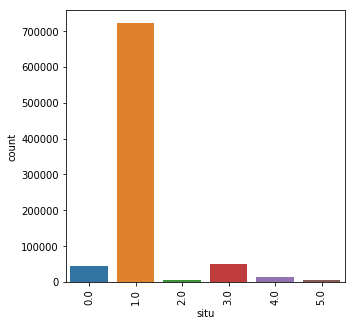

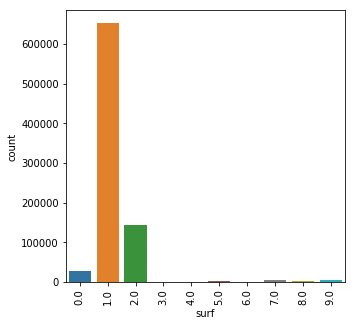

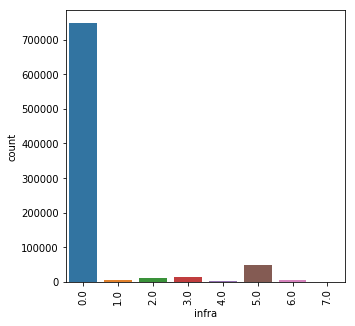

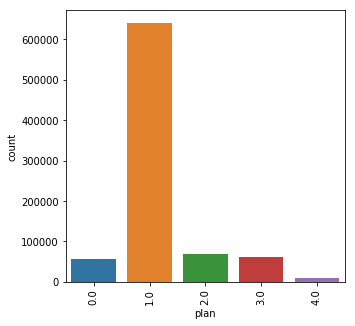

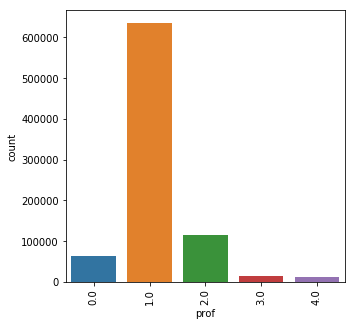

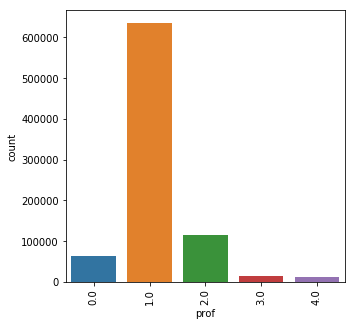

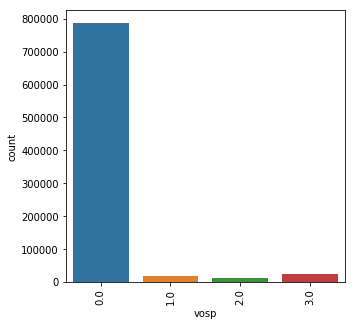

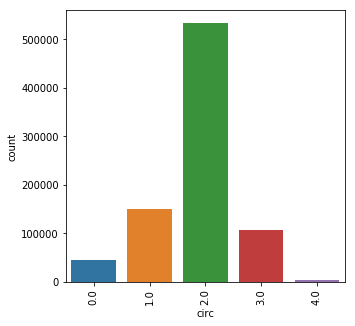

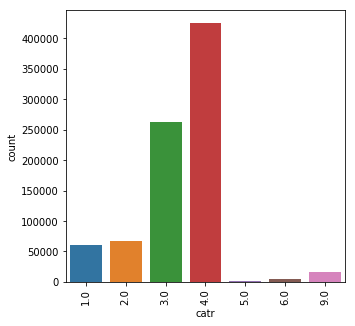

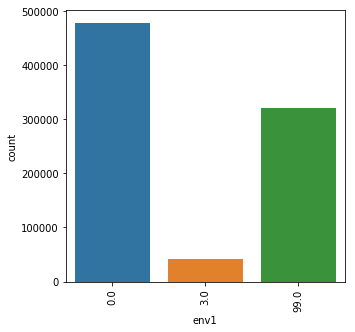

In [6]:
fig, ax = plt.subplots(figsize=(5,5))
sns.countplot(x='situ', data=places)
plt.xticks(rotation=90)
plt.show()

fig, ax = plt.subplots(figsize=(5,5))
sns.countplot(x='surf', data=places)
plt.xticks(rotation=90)
plt.show()

fig, ax = plt.subplots(figsize=(5,5))
sns.countplot(x='plan', data=places)
plt.xticks(rotation=90)
plt.show()

fig, ax = plt.subplots(figsize=(5,5))
sns.countplot(x='prof', data=places)
plt.xticks(rotation=90)
plt.show()

fig, ax = plt.subplots(figsize=(5,5))
sns.countplot(x='prof', data=places)
plt.xticks(rotation=90)
plt.show()

fig, ax = plt.subplots(figsize=(5,5))
sns.countplot(x='vosp', data=places)
plt.xticks(rotation=90)
plt.show()

fig, ax = plt.subplots(figsize=(5,5))
sns.countplot(x='circ', data=places)
plt.xticks(rotation=90)
plt.show()

fig, ax = plt.subplots(figsize=(5,5))
sns.countplot(x='catr', data=places)
plt.xticks(rotation=90)
plt.show()


fig, ax = plt.subplots(figsize=(5,5))
sns.countplot(x='env1', data=places)
plt.xticks(rotation=90)
plt.show()

In [9]:
places['catr'].unique()

array([  3.,   4.,   9.,   2.,   1.,   5.,   6.,  nan])

In [30]:
#Definir as funções
def gravGroupcatr(x):
    if x ==1 or x ==2 or x==3:
        return 0
#1 - Highway
#2 - National Road
#3 - Departmental Road
    elif x ==4:
        return 1
#4 - Communal Way
    elif x==5 or x==6 or x==9 or x==0:
        return 2
#5 - Off public network
#6 - Parking lot open to public traffic
#9 - other
#0

def gravGroupcirc(x):
    if x ==1 or x ==3 or x ==4 or x==0:
        return 0
#1 - One way
#4 - With variable assignment channels
#3 - Separated carriageways
    elif x ==2:
        return 1

def gravGroupenv1(x):
    if x ==0 or x==1 or x==2 or x ==3 or x==4:
        return 0
    elif x == 99:
        return 1

def gravGrouplarrout(x):
    if x<=100:
        return 0
    elif x>100:
        return 1

def gravGroupplan(x):
    if x==1:
        return 0
    elif x==2 or x==3 or x==4 or x==0:
        return 1

def gravGroupprof(x):
    if x==1:
        return 0
    elif x==2 or x==3 or x==4 or x==0:
        return 1
    
def gravGroupsitu(x):
    if x==1:
        return 0
    elif x==2 or x==3 or x==4 or x==5 or x==0:
        return 1

def gravGroupsurf(x):
    if x==1:
        return 0
    elif x==2 or x==3 or x==4 or x==5 or x==7:
        return 1
    elif x==6 or x==8 or x==9 or x==0:
        return 2
        
def gravGroupvosp(x):
    if x==1 or x==2 or x==3:
        return 0
    elif x==0:
        return 1
    else:
        return 1



In [31]:
#Drop de colunas
Placescopias = Placescopias.drop(columns=['lartpc','voie','v1','v2','nbv','nbv','pr','pr1','lartpc','infra'])

#Substituição pela moda 
catr_mode= Placescopias['catr'].mode()
env1_mode= Placescopias['env1'].mode()
circ_mode= Placescopias['circ'].mode()
larrout_mode= Placescopias['larrout'].mode()
plan_mode= Placescopias['plan'].mode()
prof_mode= Placescopias['prof'].mode()
situ_mode= Placescopias['situ'].mode()
surf_mode= Placescopias['surf'].mode()
vosp_mode= Placescopias['vosp'].mode()



Placescopias['catr'] = Placescopias.catr.replace(np.nan, catr_mode[0])
Placescopias['circ'] = Placescopias.circ.replace(np.nan, circ_mode[0])
Placescopias['env1'] = Placescopias.env1.replace(np.nan, env1_mode[0])
Placescopias['larrout'] = Placescopias.larrout.replace(np.nan, larrout_mode[0])
Placescopias['plan'] = Placescopias.plan.replace(np.nan, plan_mode[0])
Placescopias['prof'] = Placescopias.prof.replace(np.nan, prof_mode[0])
Placescopias['situ'] = Placescopias.situ.replace(np.nan, situ_mode[0])
Placescopias['surf'] = Placescopias.surf.replace(np.nan, surf_mode[0])
Placescopias['vosp'] = Placescopias.vosp.replace(np.nan, vosp_mode[0])

In [24]:
#Placescopias.hist(figsize=(10,15))
#teste = Placescopias['catr'].mode()
#teste[0]
#Placescopias['catr'].fillna(teste)
Env1 = Placescopias[Placescopias['catr'] ==3] 
Env1.groupby('env1').count()

,Num_Acc,catr,circ,vosp,prof,plan,larrout,surf,situ
env1,,,,,,,,,
0.0,148973,148973,148973,148973,148973,148973,148973,148973,148973
3.0,8833,8833,8833,8833,8833,8833,8833,8833,8833
99.0,104884,104884,104884,104884,104884,104884,104884,104884,104884


In [32]:
Placescopias['catr'] = Placescopias['catr'].apply(gravGroupcatr)
Placescopias['circ'] = Placescopias['circ'].apply(gravGroupcirc)
Placescopias['env1'] = Placescopias['env1'].apply(gravGroupenv1)
Placescopias['larrout'] = Placescopias['larrout'].apply(gravGrouplarrout)
Placescopias['plan'] = Placescopias['plan'].apply(gravGroupplan)
Placescopias['prof'] = Placescopias['prof'].apply(gravGroupprof)
Placescopias['situ'] = Placescopias['situ'].apply(gravGroupsitu)
Placescopias['surf'] = Placescopias['surf'].apply(gravGroupsurf)
Placescopias['vosp'] = Placescopias['vosp'].apply(gravGroupvosp)

In [582]:
#placesbackup = Placescopias.copy()
placesbackup_final = Placescopias.copy()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f07752ca978>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f077631f0f0>]], dtype=object)

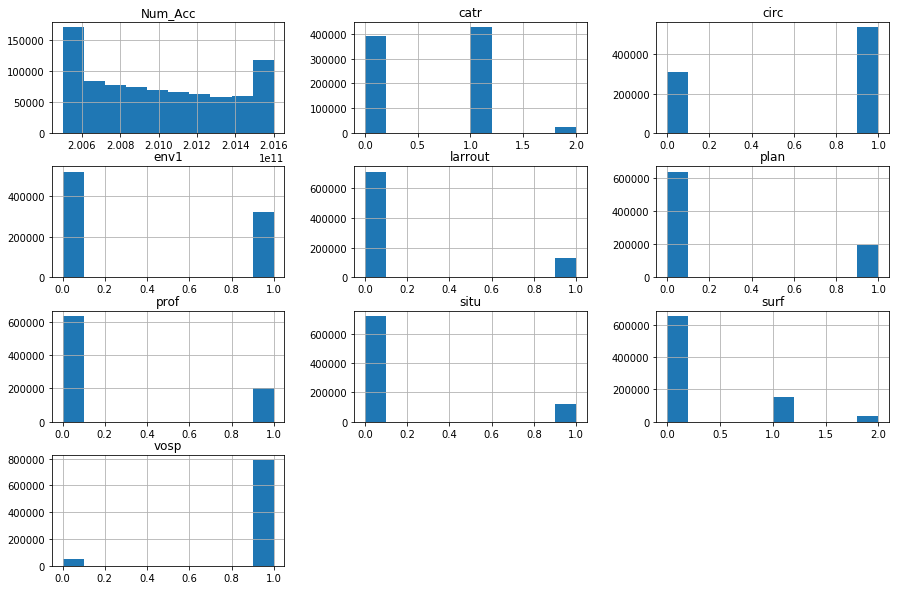

In [33]:
Placescopias.hist(figsize=(15,10))

In [45]:
places.columns

Index(['Num_Acc', 'catr', 'voie', 'v1', 'v2', 'circ', 'nbv', 'pr', 'pr1',
       'vosp', 'prof', 'plan', 'lartpc', 'larrout', 'surf', 'infra', 'situ',
       'env1'],
      dtype='object')

In [34]:
#Placescopias = Placescopias.drop(columns='env1')

In [35]:
Placescopias.to_csv('Places_done.csv', sep=',')

In [46]:
Placescopias.columns

Index(['Num_Acc', 'catr', 'circ', 'vosp', 'prof', 'plan', 'larrout', 'surf',
       'situ'],
      dtype='object')

In [ ]:
#Início 18
#Final 9

In [72]:
count_att1 = len(places['circ']) - places['circ'].count()

count_att1_b = len(places.loc[places['circ']==2])
print ((count_att1_b*100)/len(places))


63.43244224599249


In [71]:
len(places)

839985

In [67]:
places['catr'].count()

839984

In [68]:
count_att1

1

In [69]:
count_att1_b

425061